# VesSAP Dataset Exploration using Voreen based graph generation

In [179]:
import pandas as pd
import sys
import numpy as np
import argparse
import os
import os.path as osp
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
df_nodes1 = pd.read_csv("/media/juli/voreendisk/review/BALBc-no1_iso3um_stitched_segmentation_bulge_size_3.0_nodes_processed.csv",sep=';')
df_edges1 = pd.read_csv("/media/juli/voreendisk/review/BALBc-no1_iso3um_stitched_segmentation_bulge_size_3.0_edges_processed.csv",sep=';')
df_atlas1 = pd.read_csv("/media/juli/voreendisk/review/BALBc-no1_iso3um_stitched_segmentation_bulge_size_3.0_atlas_processed.csv",sep=';')

In [181]:
df_new1 = df_atlas1.idxmax(axis=1)
df_new1 = df_new1.str.replace('Region_Acronym_','')

In [182]:
df_nodes1['region'] = df_new1

In [183]:
df_nodes1 = df_nodes1.drop(df_nodes1[df_nodes1.region=='bgr'].index)
df_nodes1 = df_nodes1.drop(df_nodes1[df_nodes1.region=='root'].index)
df_nodes1.head()

,id,pos_x,pos_y,pos_z,degree,isAtSampleBorder,region
12,12,1479.0,3880.0,61.0,1,0,CUL4
16,16,1651.0,3788.0,63.0,1,0,CUL4
18,18,1542.0,3796.0,66.0,1,0,CUL4
19,19,1680.0,3803.0,66.0,1,0,CUL4
20,20,1410.0,3808.0,66.0,1,0,CUL4


In [184]:
grouped_df1 = df_nodes1.groupby("region")
mean_df1 = grouped_df1.mean()
mean_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, ACA to sAMY
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                73 non-null     float64
 1   pos_x             73 non-null     float64
 2   pos_y             73 non-null     float64
 3   pos_z             73 non-null     float64
 4   degree            73 non-null     float64
 5   isAtSampleBorder  73 non-null     float64
dtypes: float64(6)
memory usage: 4.0+ KB


In [185]:
df_num_nodes1 = df_nodes1['region'].value_counts(sort=False).sort_index()

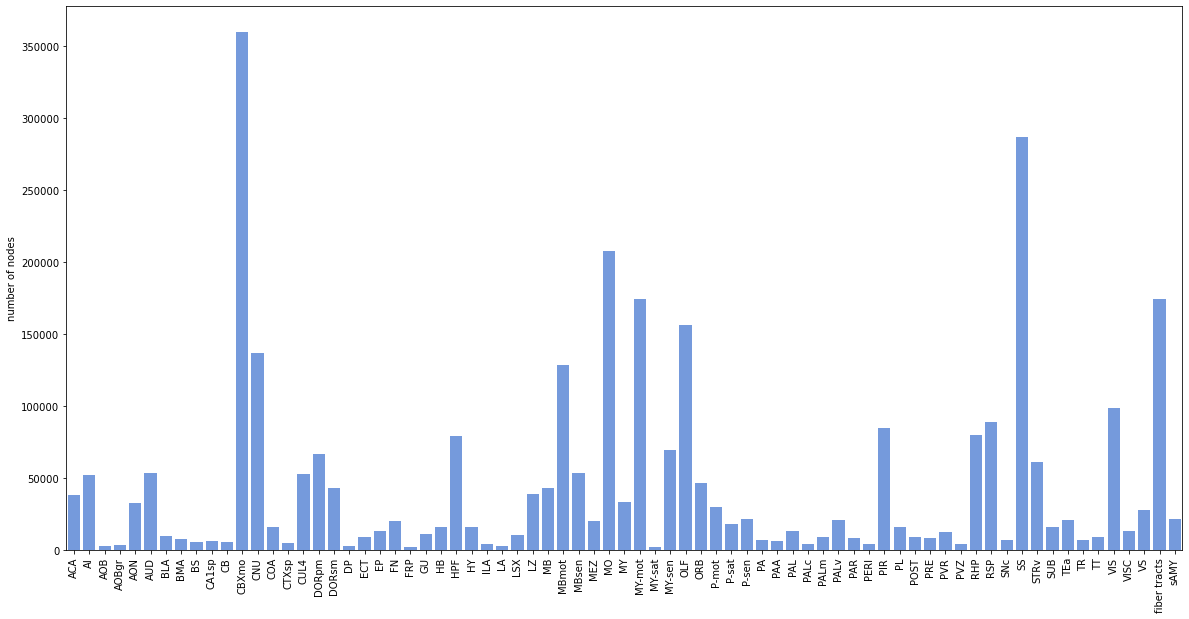

In [186]:
indexNamesArr1 = df_num_nodes1.index.values
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 10)
plt.xticks(rotation=90)
ax = sns.barplot(x=indexNamesArr1,y=df_num_nodes1.values,color='cornflowerblue')
ax.set_ylabel("number of nodes")
fig.savefig('num_nodes_by_region.pdf')

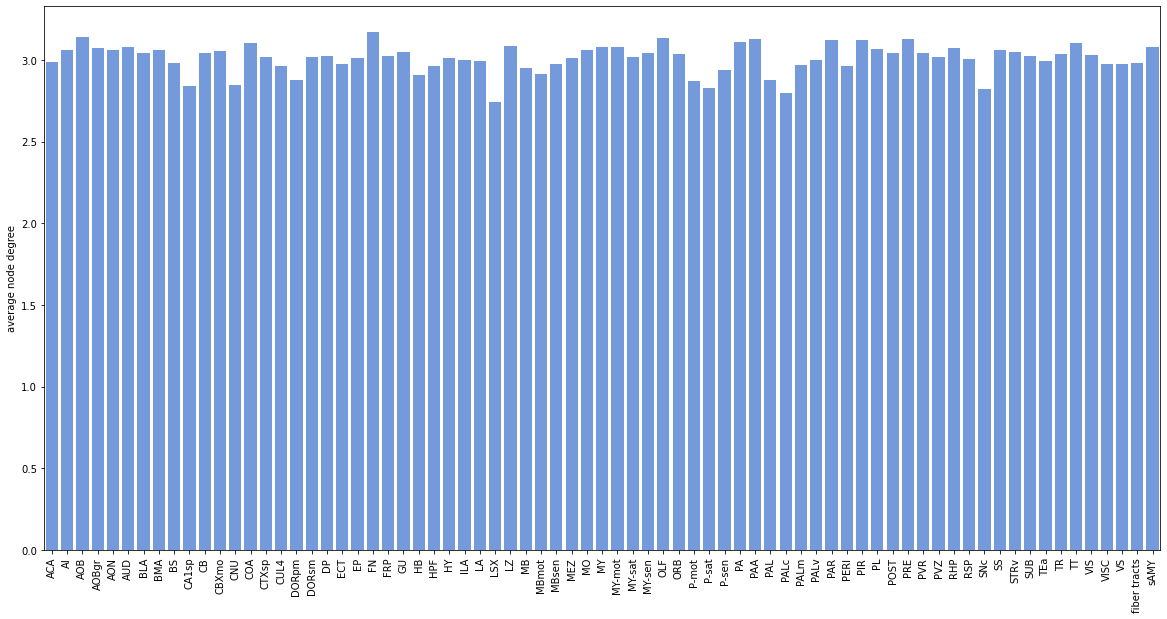

In [191]:
indexNamesArr1 = df_num_nodes1.index.values
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 10)
plt.xticks(rotation=90)
ax = sns.barplot(x=indexNamesArr1,y=mean_df1['degree'],color='cornflowerblue')
ax.set_ylabel("average node degree")
fig.savefig('num_nodes_by_region.pdf')

In [187]:
del df_edges1
del df_atlas1

In [193]:
df_nodes = pd.read_csv("/media/juli/voreendisk/review/BALBc-no1_iso3um_stitched_segmentation_bulge_size_3.0_nodes_processed.csv",sep=';')
df_edges = pd.read_csv("/media/juli/voreendisk/review/BALBc-no1_iso3um_stitched_segmentation_bulge_size_3.0_edges_processed.csv",sep=';')
df_atlas = pd.read_csv("/media/juli/voreendisk/review/BALBc-no1_iso3um_stitched_segmentation_bulge_size_3.0_atlas_processed.csv",sep=';')

In [7]:
node1_region = []
node2_region = []

from tqdm import tqdm

for i in tqdm(range(len(df_edges))):
    node1id = int(df_edges.iloc[i]['node1id'])
    node2id = int(df_edges.iloc[i]['node2id'])
    node1_region.append(df_nodes.iloc[node1id]['region'])
    node2_region.append(df_nodes.iloc[node2id]['region'])

100%|██████████| 5345897/5345897 [43:08<00:00, 2065.02it/s]  


In [194]:
df_reg1 = pd.Series(node1_region)
df_reg2 = pd.Series(node2_region)

In [195]:
df_edges['reg1'] = df_reg1.values
df_edges['reg2'] = df_reg2.values

In [203]:
df_select2 = df_edges.loc[(df_edges['reg1'] == df_edges['reg2'])]
df_select2.head()
print(len(df_select))

4974619


In [204]:
grouped_df2 = df_select2.groupby("reg1")
grouped_df2.head()

,id,node1id,node2id,length,distance,curveness,volume,avgCrossSection,minRadiusAvg,minRadiusStd,...,maxRadiusAvg,maxRadiusStd,roundnessAvg,roundnessStd,node1_degree,node2_degree,num_voxels,hasNodeAtSampleBorder,reg1,reg2
0,0,0,278560,182.46400,167.94600,1.08644,9164,50.22360,2.69977,0.895707,...,5.59913,1.816460,0.493999,0.115333,1,3,160,1,bgr,bgr
1,1,1,3,9.98625,6.70820,1.48866,97,9.71335,1.00883,0.279294,...,3.28097,0.889155,0.315612,0.064445,1,1,8,1,bgr,bgr
2,2,2,249900,2.48805,2.44949,1.01574,134,53.85750,2.86015,0.000000,...,6.59880,0.000000,0.433435,0.000000,1,3,1,1,bgr,bgr
3,3,4,249907,24.57610,20.87260,1.17743,1201,48.86860,1.64473,0.701625,...,7.07376,1.052620,0.234859,0.105392,1,3,19,1,bgr,bgr
4,4,5,249901,3.66110,3.60555,1.01541,330,90.13680,2.80429,0.120360,...,7.93039,1.245410,0.364998,0.072498,1,3,2,1,bgr,bgr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242715,242715,242716,3364569,17.06970,16.05880,1.06295,199,11.65810,1.45159,0.347965,...,2.57231,0.761843,0.582772,0.140764,1,3,14,0,PAA,PAA
243966,243966,243967,3391321,18.12070,17.11720,1.05862,415,22.90200,1.97653,0.418713,...,3.65142,0.594736,0.547267,0.102254,1,3,16,0,PAA,PAA
244354,244354,244355,3374034,27.79600,26.40080,1.05285,520,18.70770,1.92019,0.789639,...,3.17212,0.909016,0.591197,0.126973,1,3,23,0,PAA,PAA
244634,244634,244635,3407215,19.54090,15.42720,1.26665,203,10.38850,1.31262,0.409606,...,2.79562,0.983151,0.511133,0.173576,1,3,15,0,PAA,PAA


In [205]:
# now determine mean of features by group
mean_df2 = grouped_df2.mean()
mean_df2.head()
mean_df2.drop('bgr',inplace=True)
mean_df2.drop('root',inplace=True)

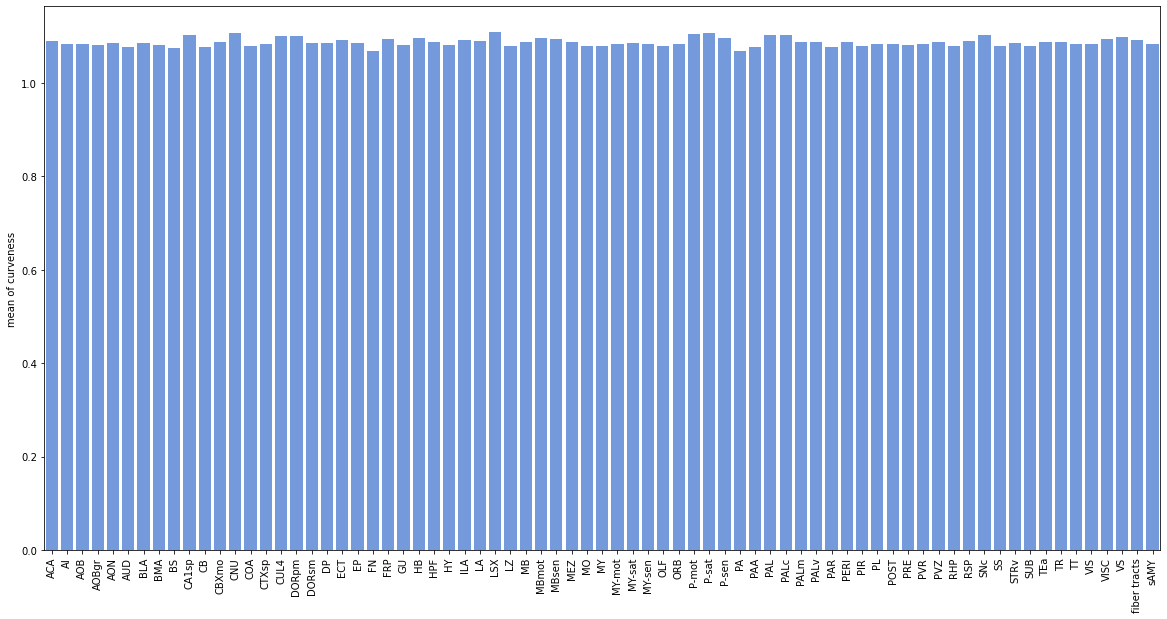

In [206]:
indexNamesArr3 = mean_df2.index.values
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 10)
plt.xticks(rotation=90)
ax = sns.barplot(x=indexNamesArr3,y=mean_df2['curveness'],color='cornflowerblue')
ax.set_ylabel("mean of curveness")
fig.savefig('curveness.pdf')

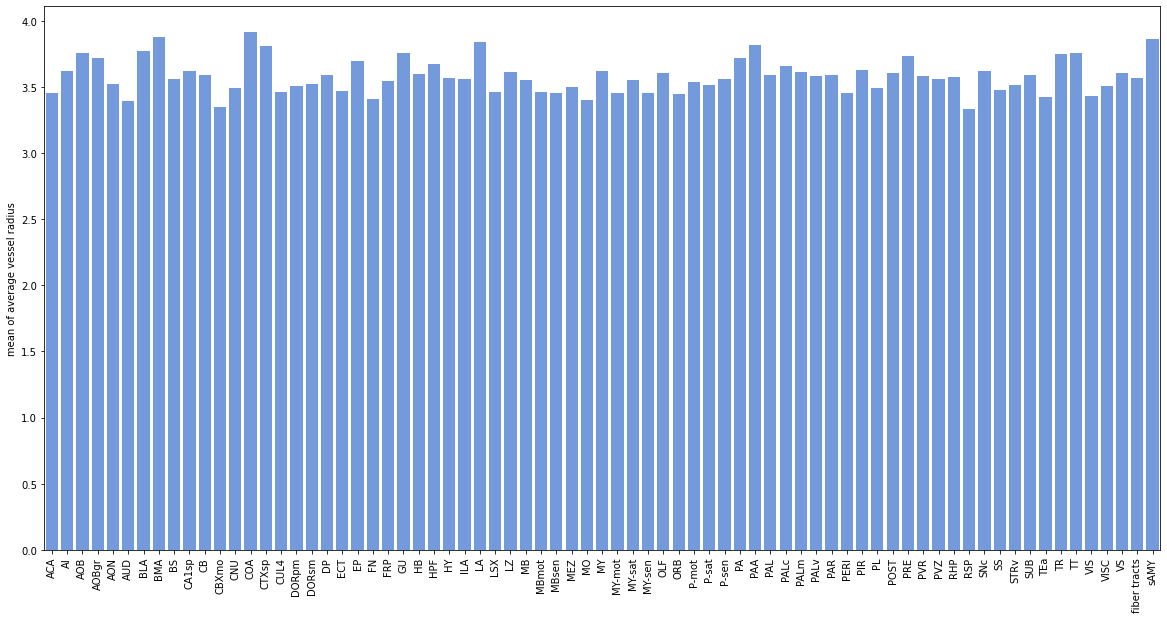

In [208]:
indexNamesArr4 = mean_df2.index.values
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 10)
plt.xticks(rotation=90)
ax = sns.barplot(x=indexNamesArr4,y=mean_df2['avgRadiusAvg'],color='cornflowerblue')
ax.set_ylabel("mean of average vessel radius")
fig.savefig('radius.pdf')

In [224]:
df_nodes = pd.read_csv("/media/juli/voreendisk/review/BALBc-no1_iso3um_stitched_segmentation_bulge_size_3.0_nodes_processed.csv",sep=';')
df_edges = pd.read_csv("/media/juli/voreendisk/review/BALBc-no1_iso3um_stitched_segmentation_bulge_size_3.0_edges_processed.csv",sep=';')
df_atlas = pd.read_csv("/media/juli/voreendisk/review/BALBc-no1_iso3um_stitched_segmentation_bulge_size_3.0_atlas_processed.csv",sep=';')

In [225]:
df_edges['reg1'] = df_reg1.values
df_edges['reg2'] = df_reg2.values

In [226]:
df_select3 = df_edges.loc[(df_edges['reg1'] == df_edges['reg2'])]
df_select3.head()
print(len(df_select3))

4974619


In [227]:
grouped_df3 = df_select3.groupby("reg1")
grouped_df3.head()

,id,node1id,node2id,length,distance,curveness,volume,avgCrossSection,minRadiusAvg,minRadiusStd,...,maxRadiusAvg,maxRadiusStd,roundnessAvg,roundnessStd,node1_degree,node2_degree,num_voxels,hasNodeAtSampleBorder,reg1,reg2
0,0,0,278560,182.46400,167.94600,1.08644,9164,50.22360,2.69977,0.895707,...,5.59913,1.816460,0.493999,0.115333,1,3,160,1,bgr,bgr
1,1,1,3,9.98625,6.70820,1.48866,97,9.71335,1.00883,0.279294,...,3.28097,0.889155,0.315612,0.064445,1,1,8,1,bgr,bgr
2,2,2,249900,2.48805,2.44949,1.01574,134,53.85750,2.86015,0.000000,...,6.59880,0.000000,0.433435,0.000000,1,3,1,1,bgr,bgr
3,3,4,249907,24.57610,20.87260,1.17743,1201,48.86860,1.64473,0.701625,...,7.07376,1.052620,0.234859,0.105392,1,3,19,1,bgr,bgr
4,4,5,249901,3.66110,3.60555,1.01541,330,90.13680,2.80429,0.120360,...,7.93039,1.245410,0.364998,0.072498,1,3,2,1,bgr,bgr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242715,242715,242716,3364569,17.06970,16.05880,1.06295,199,11.65810,1.45159,0.347965,...,2.57231,0.761843,0.582772,0.140764,1,3,14,0,PAA,PAA
243966,243966,243967,3391321,18.12070,17.11720,1.05862,415,22.90200,1.97653,0.418713,...,3.65142,0.594736,0.547267,0.102254,1,3,16,0,PAA,PAA
244354,244354,244355,3374034,27.79600,26.40080,1.05285,520,18.70770,1.92019,0.789639,...,3.17212,0.909016,0.591197,0.126973,1,3,23,0,PAA,PAA
244634,244634,244635,3407215,19.54090,15.42720,1.26665,203,10.38850,1.31262,0.409606,...,2.79562,0.983151,0.511133,0.173576,1,3,15,0,PAA,PAA


In [229]:
df_edges = df_edges[df_edges.reg1 != 'bgr']
df_edges = df_edges[df_edges.reg2 != 'bgr']
df_edges = df_edges[df_edges.reg1 != 'root']
df_edges = df_edges[df_edges.reg2 != 'root']

In [230]:
df_num_edges = df_edges['reg1'].value_counts(sort=False).sort_index()


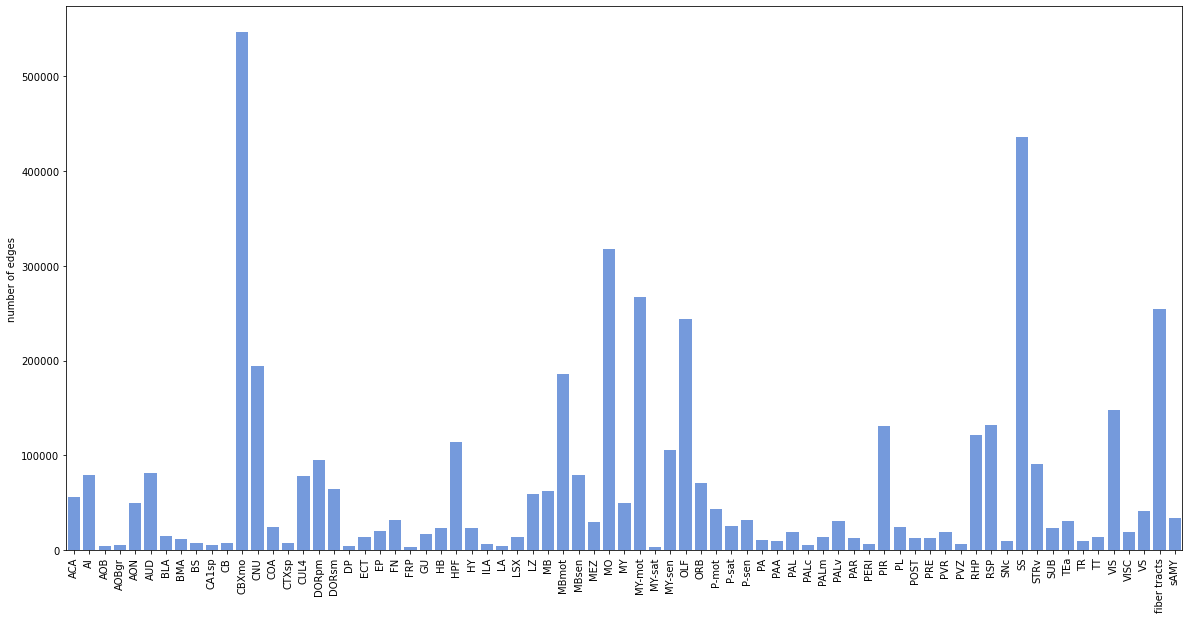

In [231]:
indexNamesArr6 = df_num_edges.index.values
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 10)
plt.xticks(rotation=90)
ax = sns.barplot(x=indexNamesArr6,y=df_num_edges.values,color='cornflowerblue')
ax.set_ylabel("number of edges")
fig.savefig('num_edges_by_region.pdf')

In [237]:
indexNamesArr1= [w.replace('fiber tracts', 'fiber') for w in indexNamesArr1]
indexNamesArr6= [w.replace('fiber tracts', 'fiber') for w in indexNamesArr6]

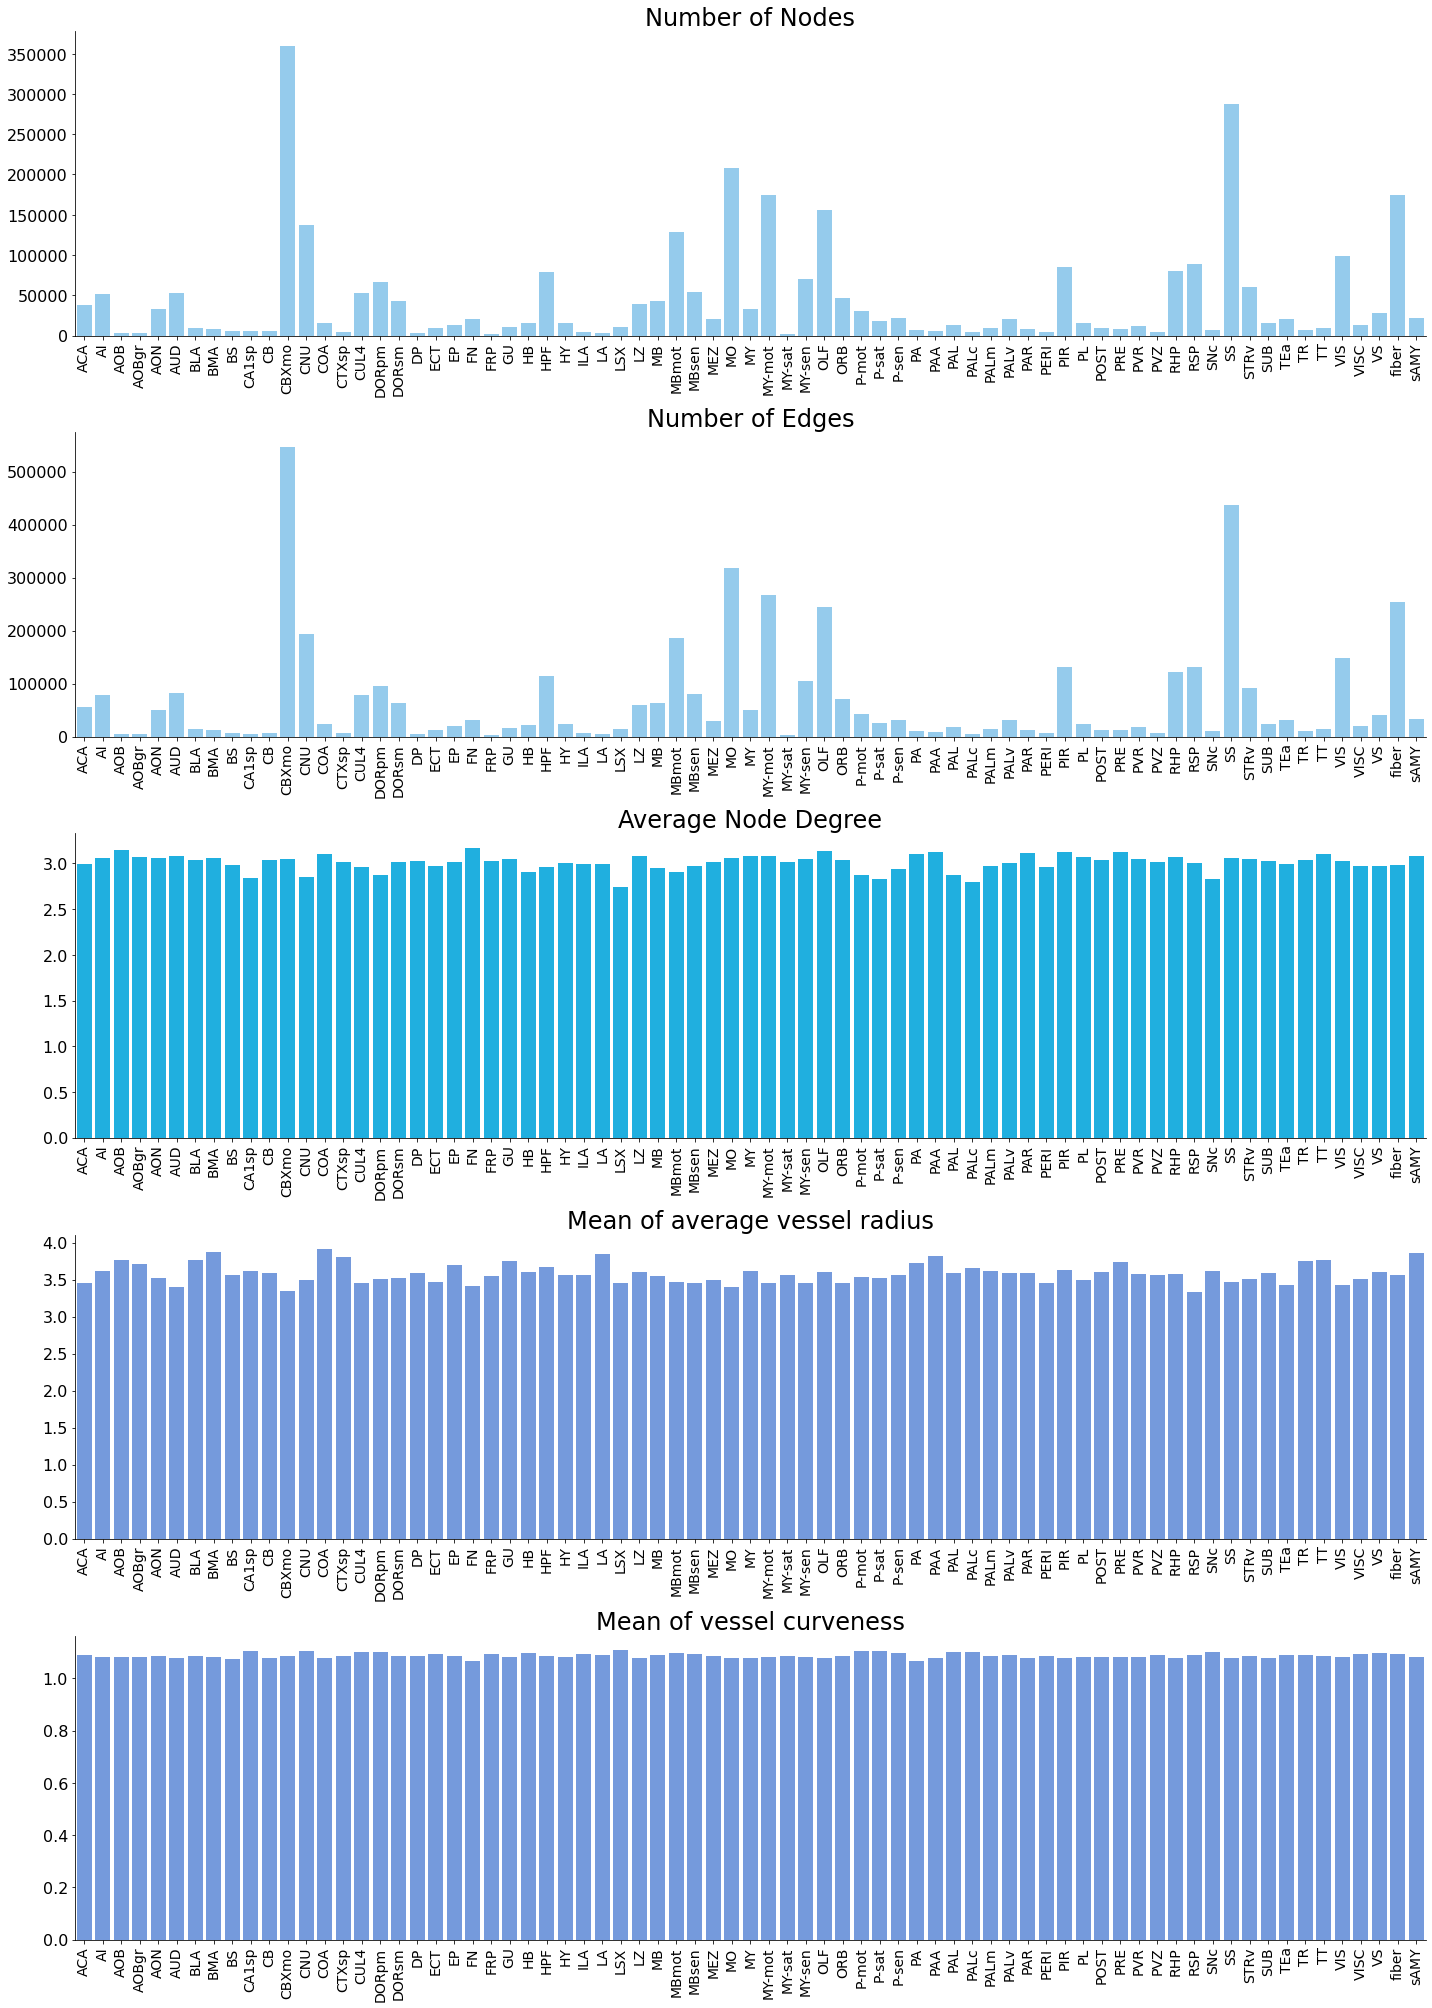

<Figure size 18000x12000 with 0 Axes>

In [270]:
indexNamesArr = mean_df.index.values
plt.rc('axes', titlesize=24)     # fontsize of the axes title
fig, ax = plt.subplots(5)

fig.set_size_inches(20, 28)

plt.figure(dpi=3000)

# plot 1 - Number of Nodes
sns.barplot(x=indexNamesArr1,y=df_num_nodes1.values,color='lightskyblue', ax=ax[0])
sns.barplot(x=indexNamesArr1,y=mean_df1['degree'],color='deepskyblue',ax=ax[2])
sns.barplot(x=indexNamesArr6,y=df_num_edges.values,color='lightskyblue',ax=ax[1])
sns.barplot(x=indexNamesArr1,y=mean_df2['avgRadiusAvg'],color='cornflowerblue',ax=ax[3])
sns.barplot(x=indexNamesArr1,y=mean_df2['curveness'],color='cornflowerblue',ax=ax[4])

ax[0].title.set_text('Number of Nodes')
ax[1].title.set_text('Number of Edges')
ax[2].title.set_text('Average Node Degree')
ax[3].title.set_text('Mean of average vessel radius')
ax[4].title.set_text('Mean of vessel curveness')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
#ax[0].set_ylabel("number of nodes", fontsize=14)
ax[0].tick_params(axis='x', rotation=90, labelsize=14)

ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
#ax[2].set_ylabel("average node degree", fontsize=14)
ax[2].tick_params(axis='x', rotation=90, labelsize=14)


ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
#ax[1].set_ylabel("number of edges", fontsize=14)
ax[1].tick_params(axis='x', rotation=90, labelsize=14)

ax[3].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].set_ylabel("mean of average vessel radius", fontsize=14)
ax[3].tick_params(axis='x', rotation=90, labelsize=14)

ax[4].spines['top'].set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].set_ylabel("mean of vessel curveness", fontsize=14)
ax[4].tick_params(axis='x', rotation=90, labelsize=14)

ax[0].set_ylabel("", fontsize=16)
ax[1].set_ylabel("", fontsize=16)
ax[2].set_ylabel("", fontsize=16)
ax[3].set_ylabel("", fontsize=16)
ax[4].set_ylabel("", fontsize=16)

ax[0].tick_params(axis='y', labelsize=16)
ax[1].tick_params(axis='y', labelsize=16)
ax[2].tick_params(axis='y', labelsize=16)
ax[3].tick_params(axis='y', labelsize=16)
ax[4].tick_params(axis='y', labelsize=16)

fig.tight_layout()


fig.savefig('final.pdf')

['ACA',
 'AI',
 'AOB',
 'AOBgr',
 'AON',
 'AUD',
 'BLA',
 'BMA',
 'BS',
 'CA1sp',
 'CB',
 'CBXmo',
 'CNU',
 'COA',
 'CTXsp',
 'CUL4',
 'DORpm',
 'DORsm',
 'DP',
 'ECT',
 'EP',
 'FN',
 'FRP',
 'GU',
 'HB',
 'HPF',
 'HY',
 'ILA',
 'LA',
 'LSX',
 'LZ',
 'MB',
 'MBmot',
 'MBsen',
 'MEZ',
 'MO',
 'MY',
 'MY-mot',
 'MY-sat',
 'MY-sen',
 'OLF',
 'ORB',
 'P-mot',
 'P-sat',
 'P-sen',
 'PA',
 'PAA',
 'PAL',
 'PALc',
 'PALm',
 'PALv',
 'PAR',
 'PERI',
 'PIR',
 'PL',
 'POST',
 'PRE',
 'PVR',
 'PVZ',
 'RHP',
 'RSP',
 'SNc',
 'SS',
 'STRv',
 'SUB',
 'TEa',
 'TR',
 'TT',
 'VIS',
 'VISC',
 'VS',
 'fiber',
 'sAMY']

### Vessel Feature Distribution

In [37]:
df_nodes = pd.read_csv("/media/juli/voreendisk/review/BALBc-no1_iso3um_stitched_segmentation_bulge_size_3.0_nodes_processed.csv",sep=';')
df_edges = pd.read_csv("/media/juli/voreendisk/review/BALBc-no1_iso3um_stitched_segmentation_bulge_size_3.0_edges_processed.csv",sep=';')
df_atlas = pd.read_csv("/media/juli/voreendisk/review/BALBc-no1_iso3um_stitched_segmentation_bulge_size_3.0_atlas_processed.csv",sep=';')

In [ ]:
features =  ['length', 'distance', 'curveness', 'avgCrossSection', 
             'minRadiusAvg', 'minRadiusStd', 'avgRadiusAvg', 
             'avgRadiusStd', 'maxRadiusAvg', 'maxRadiusStd', 
             'roundnessAvg', 'roundnessStd', 'node1_degree', 'node2_degree',
             'num_voxels', 'volume']

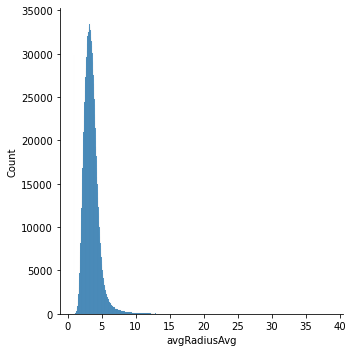

In [43]:
sns.displot(df_edges['avgRadiusAvg'])

GRAPH MEASUREMENTS

In [39]:
import networkx as nx

ModuleNotFoundError: No module named 'networkx'

DUMMY TESTS

In [85]:
df_edges_dummy = df_edges.head(50000).copy()

In [86]:
test1_region = []
test2_region = []
import random

for i in tqdm(range(0,len(df_edges_dummy))):
    test1_region.append(str(random.randint(0,5)))
    test2_region.append(str(random.randint(0,5)))

100%|██████████| 50000/50000 [00:00<00:00, 382660.55it/s]


In [87]:
df_reg1 = pd.Series(test1_region)
df_reg2 = pd.Series(test2_region)

In [89]:
df_edges_dummy['reg1'] = df_reg1.values
df_edges_dummy['reg2'] = df_reg2.values
print(len(df_edges_dummy))

50000


In [90]:
df_select = df_edges_dummy.loc[(df_edges_dummy['reg1'] == df_edges_dummy['reg2'])]
print(len(df_select))
df_select.head()

8342


,id,node1id,node2id,length,distance,curveness,volume,avgCrossSection,minRadiusAvg,minRadiusStd,...,maxRadiusAvg,maxRadiusStd,roundnessAvg,roundnessStd,node1_degree,node2_degree,num_voxels,hasNodeAtSampleBorder,reg1,reg2
2,2,2,249900,2.48805,2.44949,1.01574,134,53.85750,2.860150,0.000000,...,6.59880,0.000000,0.433435,0.000000,1,3,1,1,4,4
11,11,12,249944,57.76390,54.75400,1.05497,736,12.74150,1.381210,0.567067,...,2.80657,0.611979,0.493226,0.170148,1,3,53,0,5,5
18,18,19,250027,10.08690,9.36299,1.07732,72,7.13795,0.920582,0.364711,...,2.27126,0.626735,0.398298,0.097654,1,3,7,0,0,0
19,19,20,250275,18.36790,15.29710,1.20074,337,18.34730,1.746050,0.537128,...,3.36392,0.897642,0.525858,0.113840,1,3,15,0,0,0
21,21,22,250043,17.50960,13.63820,1.28386,256,14.62060,1.349170,0.545532,...,3.05335,1.129550,0.450456,0.097500,1,3,14,0,2,2


In [92]:
grouped_df = df_select.groupby("reg1")
grouped_df.head()

,id,node1id,node2id,length,distance,curveness,volume,avgCrossSection,minRadiusAvg,minRadiusStd,...,maxRadiusAvg,maxRadiusStd,roundnessAvg,roundnessStd,node1_degree,node2_degree,num_voxels,hasNodeAtSampleBorder,reg1,reg2
2,2,2,249900,2.48805,2.44949,1.01574,134,53.85750,2.860150,0.000000,...,6.59880,0.000000,0.433435,0.000000,1,3,1,1,4,4
11,11,12,249944,57.76390,54.75400,1.05497,736,12.74150,1.381210,0.567067,...,2.80657,0.611979,0.493226,0.170148,1,3,53,0,5,5
18,18,19,250027,10.08690,9.36299,1.07732,72,7.13795,0.920582,0.364711,...,2.27126,0.626735,0.398298,0.097654,1,3,7,0,0,0
19,19,20,250275,18.36790,15.29710,1.20074,337,18.34730,1.746050,0.537128,...,3.36392,0.897642,0.525858,0.113840,1,3,15,0,0,0
21,21,22,250043,17.50960,13.63820,1.28386,256,14.62060,1.349170,0.545532,...,3.05335,1.129550,0.450456,0.097500,1,3,14,0,2,2
24,24,25,250070,30.19760,26.44200,1.14203,391,12.94810,1.615930,0.368088,...,3.02749,0.617632,0.547332,0.126888,1,4,22,0,5,5
50,50,51,250145,13.53780,12.59630,1.07475,242,17.87580,2.028900,0.262690,...,3.23103,0.375907,0.633103,0.081838,1,3,11,0,2,2
63,63,64,250114,17.17190,16.25190,1.05661,154,8.96815,1.187310,0.350411,...,2.38346,0.891830,0.525841,0.129519,1,4,13,0,4,4
74,74,75,250691,35.94260,33.30170,1.07930,461,12.82600,1.632110,0.353162,...,3.03446,0.931403,0.558449,0.115499,1,3,26,0,3,3
79,79,80,251853,42.94350,26.72080,1.60712,765,17.81410,1.705280,0.506345,...,3.25446,1.430520,0.554473,0.123707,1,3,38,0,4,4


In [94]:
# now determine mean of features by group
mean_df = grouped_df.mean()
mean_df.head()

,id,node1id,node2id,length,distance,curveness,volume,avgCrossSection,minRadiusAvg,minRadiusStd,avgRadiusAvg,avgRadiusStd,maxRadiusAvg,maxRadiusStd,roundnessAvg,roundnessStd,node1_degree,node2_degree,num_voxels,hasNodeAtSampleBorder
reg1,,,,,,,,,,,,,,,,,,,,
0,25614.202198,25615.202198,540947.554579,18.464186,15.508613,1.180537,280.624908,13.942649,1.439478,0.413215,2.231133,0.580681,3.102953,1.005757,0.493676,0.131189,1.0,3.208059,14.232234,0.000000
1,25360.915895,25361.915895,537924.422666,18.278326,15.380925,1.181818,281.601568,14.241062,1.442660,0.409556,2.249157,0.576003,3.132003,0.996933,0.490356,0.129461,1.0,3.193158,14.084105,0.000000
2,25692.379720,25693.379720,543225.516084,18.912389,15.911837,1.179306,301.038462,14.521538,1.465317,0.419897,2.273175,0.582931,3.170439,1.016657,0.490189,0.128531,1.0,3.209091,14.638462,0.000000
3,25077.881824,25078.881824,535375.870076,18.713519,15.640193,1.188650,296.181064,14.450685,1.465823,0.416439,2.274092,0.584161,3.164822,1.016846,0.489671,0.129889,1.0,3.221838,14.433310,0.000000
4,24414.724240,24415.723499,527978.000000,19.250305,16.042262,1.190865,311.106004,14.445568,1.455713,0.415013,2.270958,0.594768,3.178426,1.046097,0.489166,0.130918,1.0,3.212750,14.891772,0.000741


In [ ]:
df_edges_dummy = df_edges_dummy.loc[(df['reg1'] == df['reg2']]

In [13]:
df_final = pd.concat([df_nodes, df_atlas], axis=1)

In [20]:
df_final.head()

df_final = df_final.rename(columns={'0':'region','id':'ID'})

df_final.head()

,ID,pos_x,pos_y,pos_z,degree,isAtSampleBorder,0
0,0,2932.0,3477.0,0.0,1,1,bgr
1,1,2916.0,3509.0,0.0,1,1,bgr
2,2,2929.0,3514.0,0.0,1,1,bgr
3,3,2919.0,3515.0,0.0,1,1,bgr
4,4,2939.0,3515.0,0.0,1,1,bgr


In [19]:
list(df_final.columns.values)

['ID', 'pos_x', 'pos_y', 'pos_z', 'degree', 'isAtSampleBorder', 0]

## Node Features

In [3]:
# Minimum
df_nodes.min()

id                    0.0
pos_x               178.0
pos_y               808.0
pos_z                 0.0
degree                1.0
isAtSampleBorder      0.0
dtype: float64

In [4]:
# Mean
df_nodes.max()

id                  3538494.00
pos_x                  3096.00
pos_y                  4719.00
pos_z                  1866.33
degree                   14.00
isAtSampleBorder          1.00
dtype: float64

In [5]:
# Maximum
df_nodes.mean()

id                  1.769247e+06
pos_x               1.563105e+03
pos_y               2.915366e+03
pos_z               9.119264e+02
degree              3.021565e+00
isAtSampleBorder    2.543454e-06
dtype: float64

## Edge Feature Range

In [15]:
features =  ['length', 'distance', 'curveness', 'avgCrossSection', 
             'minRadiusAvg', 'minRadiusStd', 'avgRadiusAvg', 
             'avgRadiusStd', 'maxRadiusAvg', 'maxRadiusStd', 
             'roundnessAvg', 'roundnessStd', 'node1_degree', 'node2_degree',
             'num_voxels', 'volume']

In [7]:
df_edges[features].min()

length                   2.000000
distance                 1.776800
curveness                0.186263
volume                   1.000000
avgCrossSection          0.298142
minRadiusAvg             0.500000
minRadiusStd             0.000000
avgRadiusAvg             0.794746
avgRadiusStd             0.000000
maxRadiusAvg             0.917424
maxRadiusStd             0.000000
roundnessAvg             0.047187
roundnessStd             0.000000
node1_degree             1.000000
node2_degree             1.000000
num_voxels               0.000000
hasNodeAtSampleBorder    0.000000
dtype: float64

In [8]:
df_edges[features].mean()

length                    12.798689
distance                  11.450001
curveness                  1.088693
volume                   389.961664
avgCrossSection           28.243327
minRadiusAvg               2.476473
minRadiusStd               0.364957
avgRadiusAvg               3.508176
avgRadiusStd               0.419654
maxRadiusAvg               4.739847
maxRadiusStd               0.713872
roundnessAvg               0.531400
roundnessStd               0.091849
node1_degree               3.133139
node2_degree               3.268482
num_voxels                 8.902883
hasNodeAtSampleBorder      0.000001
dtype: float64

In [9]:
df_edges[features].max()

length                      322.813000
distance                    300.698000
curveness                    27.434400
volume                   119459.000000
avgCrossSection            1587.499100
minRadiusAvg                 38.658200
minRadiusStd                 12.496500
avgRadiusAvg                 38.658200
avgRadiusStd                 11.999500
maxRadiusAvg                 44.129000
maxRadiusStd                 23.643300
roundnessAvg                  1.997629
roundnessStd                  1.000000
node1_degree                 14.000000
node2_degree                 14.000000
num_voxels                  256.000000
hasNodeAtSampleBorder         1.000000
dtype: float64

### Node and Edge Features

In [10]:
print("Node Features:",list(df_nodes.columns))
print("Edge Features:",list(df_edges.columns))

Node Features: ['id', 'pos_x', 'pos_y', 'pos_z', 'degree', 'isAtSampleBorder']
Edge Features: ['id', 'node1id', 'node2id', 'length', 'distance', 'curveness', 'volume', 'avgCrossSection', 'minRadiusAvg', 'minRadiusStd', 'avgRadiusAvg', 'avgRadiusStd', 'maxRadiusAvg', 'maxRadiusStd', 'roundnessAvg', 'roundnessStd', 'node1_degree', 'node2_degree', 'num_voxels', 'hasNodeAtSampleBorder']


## Statistical comparison of node features of different mouse types 

In [20]:
# loop over all mouse brains
node_stats = pd.DataFrame(columns=[ 'type','n_nodes','id','pos_x', 'pos_y','pos_z', 'degree', 'isAtSampleBorder'])

mean = pd.DataFrame(df_nodes.mean(axis=0))
node_stats = node_stats.append(mean.T, ignore_index=True)
node_stats.at[i, 'type'] = id.split('-no')[0]
node_stats.at[i,'n_nodes']= len(df_nodes.index)
    
node_stats = node_stats.drop(columns=['id','pos_x','pos_y','pos_z'])
node_stats

,type,n_nodes,degree,isAtSampleBorder
0,BALBc_no1_raw,3538495,3.021565,0.000003


## Statistical comparison of edge features of different mouse types 

In [21]:
# loop over all mouse brains
edge_stats = pd.DataFrame(columns=[ 'type','n_edges','id', 'node1id', 'node2id', 'length', 'distance', 'curveness', 
                                                      'volume', 'avgCrossSection', 'minRadiusAvg', 'minRadiusStd', 'avgRadiusAvg', 
                                                      'avgRadiusStd', 'maxRadiusAvg', 'maxRadiusStd', 'roundnessAvg', 'roundnessStd', 
                                                      'node1_degree', 'node2_degree', 'num_voxels', 'hasNodeAtSampleBorder'])
edge_mean = pd.DataFrame(df_edges.mean(axis=0))
edge_stats = edge_stats.append(edge_mean.T, ignore_index=True)
edge_stats.at[i, 'type'] = id.split('-no')[0]
edge_stats.at[i,'n_edges']= len(df_edges.index) # wrong!
    
edge_stats = edge_stats.drop(columns=['id','node1id','node2id'])
edge_stats

,type,n_edges,length,distance,curveness,volume,avgCrossSection,minRadiusAvg,minRadiusStd,avgRadiusAvg,avgRadiusStd,maxRadiusAvg,maxRadiusStd,roundnessAvg,roundnessStd,node1_degree,node2_degree,num_voxels,hasNodeAtSampleBorder
0,BALBc_no1_raw,5345897,12.798689,11.450001,1.088693,389.961664,28.243327,2.476473,0.364957,3.508176,0.419654,4.739847,0.713872,0.5314,0.091849,3.133139,3.268482,8.902883,0.000001


## Correlation Plot of the features

cf. https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

In [11]:
import pandas as pd
import numpy as np


corr = df_nodes.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,pos_x,pos_y,pos_z,degree,isAtSampleBorder
id,1.00,0.03,-0.15,0.88,0.33,-0.00
pos_x,0.03,1.00,0.00,0.04,-0.01,0.00
pos_y,-0.15,0.00,1.00,-0.17,-0.00,0.00
pos_z,0.88,0.04,-0.17,1.00,0.02,-0.00
degree,0.33,-0.01,-0.00,0.02,1.00,-0.00
isAtSampleBorder,-0.00,0.00,0.00,-0.00,-0.00,1.00


In [16]:
import pandas as pd
import numpy as np
from dataframe_image import *

corr = df_edges[features].corr()
df_styled = corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
df_styled = corr.style.background_gradient(cmap='coolwarm').set_precision(2)
df_styled.export_png('df_styled.png')



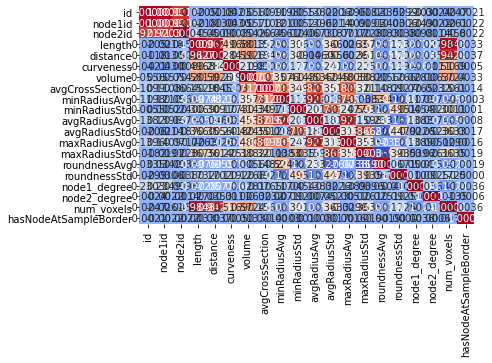

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df_edges
fig, ax = plt.subplots()
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

<AxesSubplot:>

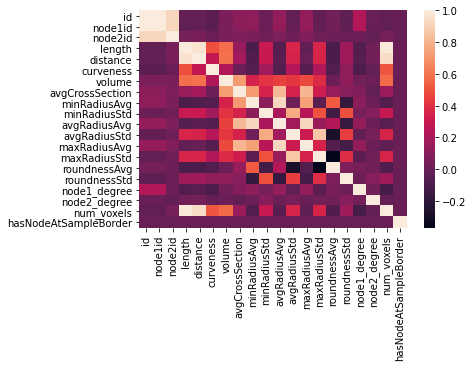

In [13]:
import seaborn as sns
corr = df_edges.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Box Plots of Features

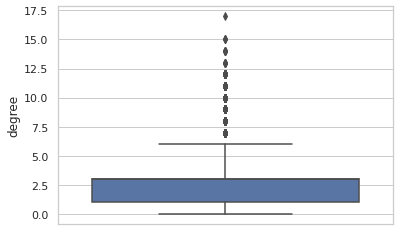

In [14]:
sns.set_theme(style="whitegrid")

for i in range(len(subfolders)):
    # get the identifier
    id = os.path.basename(os.path.normpath(subfolders[i]))
    df_nodes = pd.read_csv(osp.join(folder,id, f'{id}_nodes.csv'),sep=';')
    # df_edges = pd.read_csv(osp.join(folder,id, f'{id}_edges.csv'),sep=';')
    #mean = mean.T

sns.boxplot( y=df_nodes["degree"] );
plt.show()

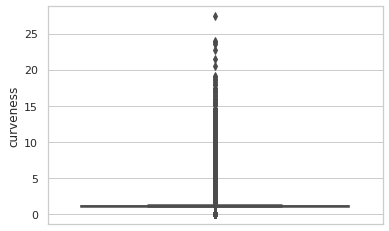

In [15]:
sns.set_theme(style="whitegrid")

for i in range(len(subfolders)):
    # get the identifier
    id = os.path.basename(os.path.normpath(subfolders[i]))
    df_edges = pd.read_csv(osp.join(folder,id, f'{id}_edges.csv'),sep=';')
    # df_edges = pd.read_csv(osp.join(folder,id, f'{id}_edges.csv'),sep=';')
    #mean = mean.T

sns.boxplot( y=df_edges["curveness"] );
plt.show()